# Interpret a computer vision model with LIME

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Model-Interpretation/blob/master/Lime/computer_vision_example.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Model-Interpretation/blob/master/Lime/computer_vision_example.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [1]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=691f890b89b8e0059c252e4c44721160a27b42583a27ae5c9513ba5c5323b220
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

import lime
from lime import lime_image

## Load model

In [3]:
model = MobileNetV2(include_top=True, weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [4]:
!wget https://raw.githubusercontent.com/TannerGilbert/Model-Interpretation/master/images/cat.jpg

--2022-07-02 11:42:11--  https://raw.githubusercontent.com/TannerGilbert/Model-Interpretation/master/images/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18668 (18K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  18.23K  --.-KB/s    in 0.001s  

2022-07-02 11:42:11 (34.6 MB/s) - ‘cat.jpg’ saved [18668/18668]



In [5]:
image = Image.open('cat.jpg')
image = image.resize((224, 224), Image.ANTIALIAS)
image = np.array(image)

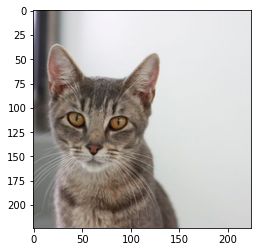

In [6]:
plt.imshow(image)

In [7]:
img = preprocess_input(np.expand_dims(image, axis=0))
img.shape

(1, 224, 224, 3)

In [8]:
preds = model.predict(img)
for x in decode_predictions(preds)[0]:
    print(x)

49152/35363 [=========================================] - 0s 0us/step
('n02123045', 'tabby', 0.4416233)
('n02124075', 'Egyptian_cat', 0.2864799)
('n02123159', 'tiger_cat', 0.11880679)
('n02127052', 'lynx', 0.002413491)
('n02123597', 'Siamese_cat', 0.002185039)


## Create LimeImageExplainer

In [9]:
%%time

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img[0].astype("double"), model.predict, top_labels=5)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 52.8 s, sys: 2.15 s, total: 55 s
Wall time: 41.1 s


## Top Class (Tabby)

In [10]:
from skimage.segmentation import mark_boundaries

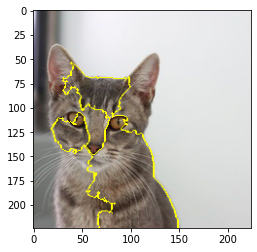

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(image, mask))

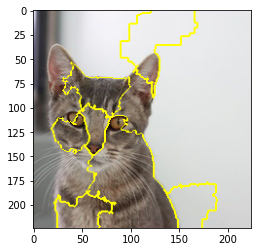

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(image, mask))